test


(6.5, 6)

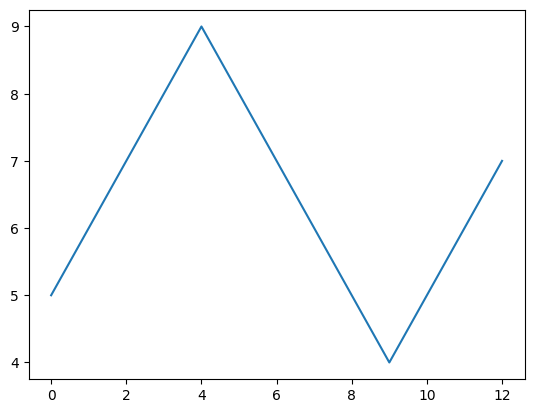

test


(6.5, 6)

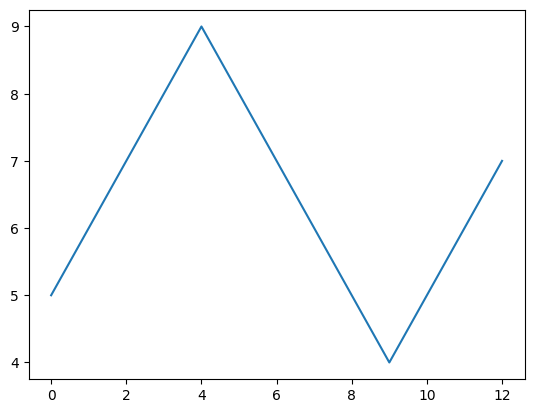

test


(6.5, 6)

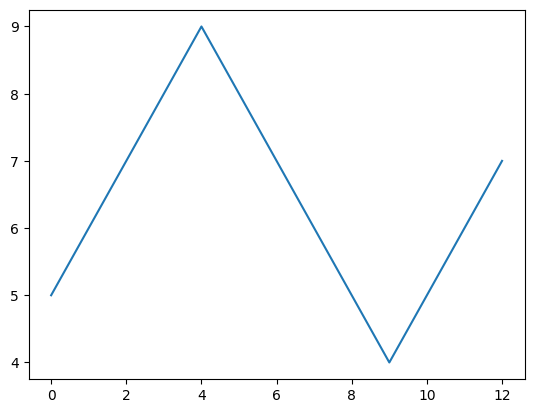

In [3]:
import matplotlib.pyplot as plt

print("test")

def findMiddleCrossing(indexPeak1, indexPeak2, ydata):
    extremum1 = ydata[indexPeak1]; extremum2 = ydata[indexPeak2]
    mCrossVal = (extremum1 + extremum2) /2
    closest_value = min(ydata[indexPeak1:indexPeak2], key=lambda x: abs(mCrossVal - x))
    mCrossIndex = ydata[indexPeak1:indexPeak2].index(closest_value) + indexPeak1
    return mCrossVal, mCrossIndex


ydata = [5,6,7,8,9,8,7,6,5,4,5,6,7]
xdata = range(0,len(ydata))
plt.plot(xdata, ydata)
findMiddleCrossing(5, 10, ydata)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Force = lambda aziAngle, :

#CA_eq: contact angle as a function of aziumthal angle. Ca: local normal velocity
#L: ?       a: ?
CA_app = lambda aziAngle, CA_eq, Ca, L, a: CA_eq(aziAngle) + (9*Ca*np.log(L/a))

In [11]:
import cv2
import numpy as np
from line_method import click_event, coordinates_on_line
##linmethod: pointa = 1766, 1782; pointb = 1928, 1916
# Read RGB image
img = cv2.imread('I:\\2023_04_06_PLMA_HexaDecane_Basler2x_Xp1_24_s11_split____GOODHALO-DidntReachSplit\\D_analysis_v2\PROC_20230612121104\\rawslicesimage\\rawslicesimage_Basler_a2A5328-15ucBAS__40087133__20230406_131652896_0023_analyzed_.png')


#imgblack = cv2.imread('C:\\Users\\Sander PC\\PycharmProjects\\InterferometryPython\\red square.png')
imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
squareSize = 10
resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

pixellocationLarge = 2250
pixellocationLarge2 = 2950

#x_offset = 468
#y_offset = 114

a = 0.827846
b = -183.776
limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax
coordinates, l = coordinates_on_line(a, b, limits)      #INCORRECT VGM. ZELF BEREKEND=1852
print(f"Length of line is {l}. (Image in plot)")

x_coords = [1766, 1928]
y_coords = [1782, 1916]
aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])
bL = y_coords[0] - a * x_coords[0]
print(f"(Large plot). a ={aL}, b = {bL}")
limitsL = [0, 5328, 0, 4608]
coordinatesLarge, lLarge = coordinates_on_line(aL, bL, limitsL)
print(f"Length of line is {lLarge}. (Large plot)")

ratioLines = lLarge / 1852
pixelLocNew = pixellocationLarge / ratioLines
print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixellocationLarge}, pixelLocNew = {pixelLocNew}")
#pixely = round(a*(pixelLocNew+466) + b)

#x_offset = round(pixelLocNew)  + 466
#y_offset = pixely

c = pixelLocNew     #c = length of line (schuine zijde)
#x_offset = round((-a*b + np.sqrt(c**2 + a**2 * c**2 - b**2)) / (1+a**2))
x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
pixely = round(a*(x_offset) + b)
y_offset = pixely
print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")

resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack
cv2.imshow('image', resizedimg)
right_clicks = []
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        right_clicks.append([x, y])
    if len(right_clicks) == 2:
        cv2.destroyAllWindows()

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)

P1 = np.array(right_clicks[0])
P2 = np.array(right_clicks[1])
print(f"Selected coordinates: {P1=}, {P2=}.")
print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")

cv2.destroyAllWindows()


Length of line is 2172.0. (Image in plot)
(Large plot). a =0.8271604938271605, b = 320.023964
Length of line is 6727.57713524293. (Large plot)
ratioLines = 3.6326010449475863, pixelLocLarge = 2250, pixelLocNew = 619.39089158426
pixelLocNew=619.39089158426 x=938, y = 593
Selected coordinates: P1=array([471, 203]), P2=array([1067,  697]).
Selected coordinates: P1 = [471, 203], P2 = [1067, 697]


In [1]:
####Working for hexadecane      (pixelLocation working properly). Change P1 & P2 for other rawsliceimages
import glob
import os.path
import cv2
import numpy as np
import csv
from line_method import click_event, coordinates_on_line
""""
This part is to show dots of pixellocations for all swellingImages, without clickingevents (below; to obtain required sizes in pixels etc.).
"""
##linmethod: pointa = 1766, 1782; pointb = 1928, 1916
# Read RGB image
source = 'D:\\2023_04_06_PLMA_HexaDecane_Basler2x_Xp1_24_s11_split____GOODHALO-DidntReachSplit\\D_analysisv4\\PROC_20230724185238'
imgList = [f for f in glob.glob(os.path.join(source, f"rawslicesimage\\*.png"))]
pixellocationLarge = [0, 2250, 2550, 6707]#2170
CLICKEVENT = False
n = 0
#nAllImages = np.arange(0, len(imgList),1)
nAllImages = [0,1]
print(f"Total amount of images in folder: {len(imgList)}. \nTotal amount of images used: {len(nAllImages)}")
for imgPath in imgList:
    if n in nAllImages:
        img = cv2.imread(imgPath)
        csvList = [f for f in glob.glob(os.path.join(source, f"csv\\*unwrapped.csv"))]

        #imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\red square.png')
        imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
        resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
        squareSize = 5
        resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

        def calcLineEquation(x_coords, y_coords):       #For eq   y = ax +b
            aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])    #a = dy /dx
            bL = y_coords[0] - aL * x_coords[0]                          #b = y(x) - a*x
            return aL, bL
        def calcLineLength(edge1, edge2):   #edge1(x,y)    edge2(x,y)
            return ((edge2[0] - edge1[0])**2 + (edge2[1] - edge1[1])**2 )**0.5
        def readInDataLengthLargeImage(csvList):
            with open(csvList[0]) as f:
                summation = sum(1 for line in f)
            return summation-1

        #P1 and P2 along the draw line of Image in plot.
        #INPUT EDGES OF THE LINE WITH BORDER OF IMAGE IN PLOT AS (P1 = [x,y])
        #Check this in e.g. paint.net with the cursor
        P1 = [466, 206]
        #P2 = [1091, 725]
        P2 = [1892, 1382]           #For hexadecane
        a, b = calcLineEquation([P1[0], P2[0]], [P1[1], P2[1]])
        limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax of image in plot. Should always be same
        l = calcLineLength(P1, P2)
        print(f"Image in plot: length calculated is {l} from edges")

        #x_coords = [1766, 1782]
        #y_coords = [1928, 1916]
        #aL, bL = calcLineEquation(x_coords, y_coords)
        #print(f"(Large plot). a ={aL}, b = {bL}")
        lLarge = readInDataLengthLargeImage(csvList)    #read in OG image data length of line from counting rows in csv file
        print(f"Length of data in Large image= {lLarge}")
        ratioLines = lLarge / l

        for i, pixelLocation in enumerate(pixellocationLarge):
            pixelLocNew = pixelLocation / ratioLines
            print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixelLocation}, pixelLocNew = {pixelLocNew}")

            c = pixelLocNew     #c = length of line (schuine zijde)
            x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
            pixely = round(a*(x_offset) + b)
            y_offset = pixely
            print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")
            resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack
            resizedimg = cv2.putText(resizedimg, f"pix: {pixelLocation}", [2000, 120+i*30], cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 4)
            if CLICKEVENT:
                cv2.imshow('image', resizedimg)
                right_clicks = []
                def click_event(event, x, y, flags, params):
                    if event == cv2.EVENT_LBUTTONDOWN:
                        right_clicks.append([x, y])
                    if len(right_clicks) == 2:
                        cv2.destroyAllWindows()

                cv2.setMouseCallback('image', click_event)
                cv2.waitKey(0)
                P1 = np.array(right_clicks[0])
                P2 = np.array(right_clicks[1])
                print(f"Selected coordinates: {P1=}, {P2=}.")
                print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")
                cv2.destroyAllWindows()
        if not os.path.exists(os.path.join(source, f"rawslicesimage\\pixelLocation")):
            os.mkdir(os.path.join(source, f"rawslicesimage\\pixelLocation"))
        cv2.imwrite(os.path.join(source, f"rawslicesimage\\pixelLocation\\rawlsiceimageWithPixelLocation{n}.png") , resizedimg)
    n = n+1


Total amount of images in folder: 0. 
Total amount of images used: 2


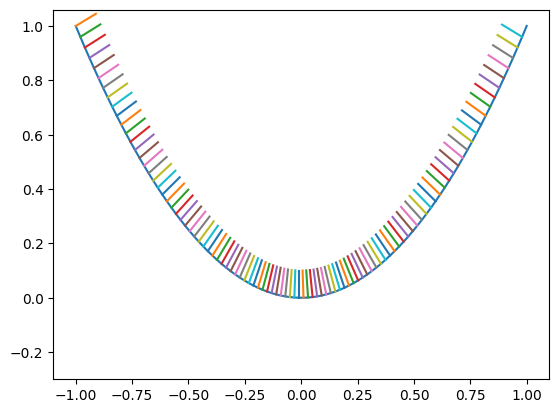

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def get_normals(length=.1):
    for idx in range(len(x)-1):
        x0, y0, xa, ya = x[idx], y[idx], x[idx+1], y[idx+1]
        dx, dy = xa-x0, ya-y0
        norm = math.hypot(dx, dy) * 1/length
        dx /= norm
        dy /= norm

        ax.plot((x0, x0-dy), (y0, y0+dx))    # plot the normals

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8, 8]

x = np.linspace(-1, 1, 100)
y = x**2
ax.set_ylim(-0.3, 1.06)
ax.plot(x, y)
get_normals()


plt.show()

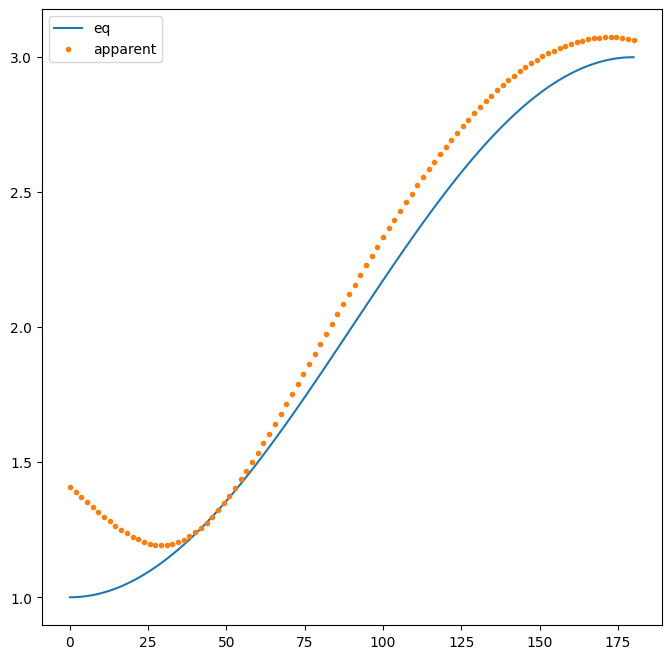

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

angle = np.linspace(0, np.pi, 100)
theta_eq = np.sin(angle-np.pi/2) + 2
#Ca = 1E-6 * np.sin(angle-np.pi/2)
Ca = 1E-2 * np.sin(np.linspace(np.pi, 3*np.pi, 100)) + 1E-2
x = 3E-3   #capillary length, ongeveer 3mm
l = 6E-12  #slip length
theta_app = (theta_eq**3 + 9*Ca*np.log(x/l))**(1/3)
#theta_app = (theta_eq**3 + 10)**(1/3)
plt.plot(angle*180/np.pi, theta_eq, label='eq')
plt.plot(angle*180/np.pi, theta_app, '.', label = 'apparent')
plt.legend(loc='best')

#9*Ca*np.log(x/l)


3333.3333333333335
73.00555274977265


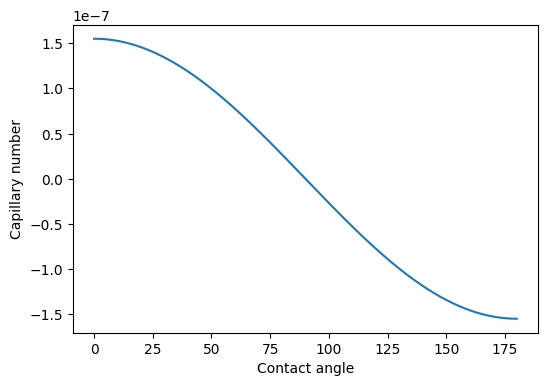

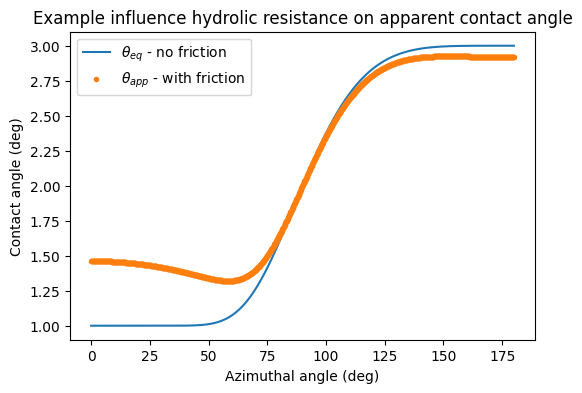

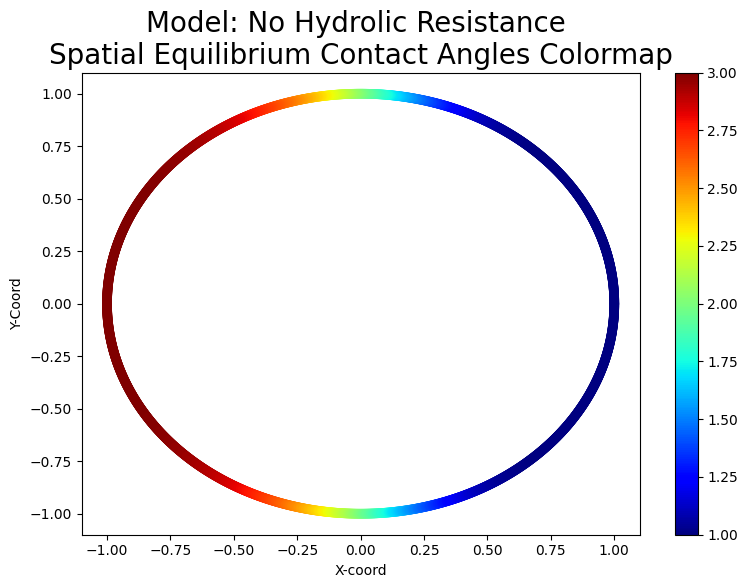

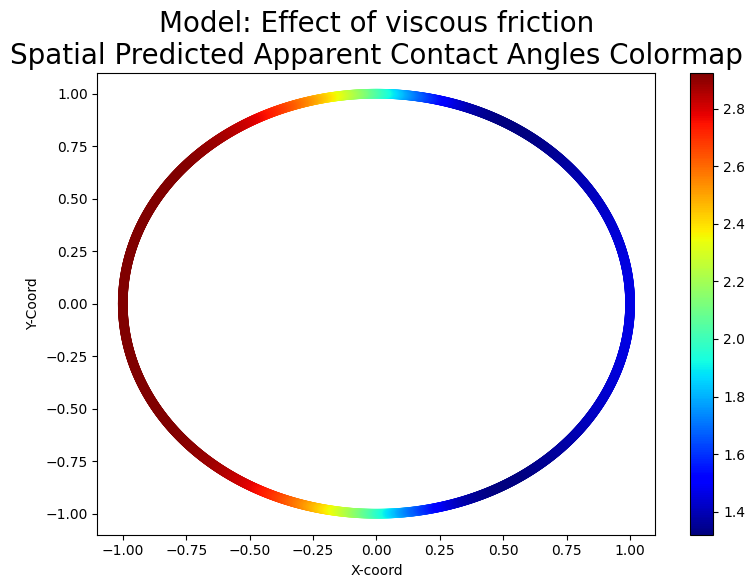

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import math

angle = np.linspace(0, np.pi, 1000)
#theta_eq = (np.sin(angle-np.pi/2) + 2) * np.pi / 180

Ca = -1.55E-7 * np.sin(angle-np.pi/2)  #OG standard Ca curve: normal sinus between + and - the value
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(angle*180/np.pi, Ca)
ax1.set(xlabel = 'Contact angle', ylabel = 'Capillary number')

x = 10E-6   #slip length, 10 micron?                     -macroscopic
l = 3E-9       #capillary length, ongeveer              -microscopic
for x in [10E-6]:
    anglerange = np.linspace(0,1,1000)
    k = 3
    #Ca = -1E-6 * ((((0.5+np.sin(anglerange*np.pi-np.pi/2)/2)**((2*(1-anglerange))**k)))*2 - 1)
    theta_eq = (((0.5+np.sin(anglerange*np.pi-np.pi/2)/2)**((2*(1-anglerange))**k))*2 + 1) * np.pi / 180
    prefactor = 9  #OG = 9
    theta_app = (theta_eq**3 + prefactor*Ca*np.log(x/l))**(1/3)
    print(f"{x/l}")
    print(f"{prefactor*np.log(x/l)}")
    #xOverL = 0.01
    #theta_app = (theta_eq**3 + 9*Ca*np.log(xOverL))**(1/3)
    fig1, ax1 = plt.subplots(figsize=(6,4))
    ax1.plot(angle*180/np.pi, theta_eq * 180 / np.pi, label=r'$\theta_{eq}$ - no friction')
    ax1.plot(angle*180/np.pi, theta_app * 180 / np.pi, '.', label = r'$\theta_{app}$ - with friction')
    ax1.set(xlabel='Azimuthal angle (deg)', ylabel='Contact angle (deg)', title='Example influence hydrolic resistance on apparent contact angle')
    ax1.legend(loc='best')
    fig1.savefig(f"C:\\Downloads\\CA vs azimuthal Ca={max(Ca)}, x={x}, l={l}.png", dpi=600)

    theta_eq = theta_eq * 180 / np.pi
    theta_app = theta_app * 180 / np.pi

    fig3, ax3 = plt.subplots(figsize=(9,6))
    xArrFinal = np.cos(angle)
    yArrFinal = np.sin(angle)
    im3 = ax3.scatter([xArrFinal, np.flip(xArrFinal)], [yArrFinal, -np.flip(yArrFinal)], c=[theta_eq, np.flip(theta_eq)], cmap='jet', vmin=min(theta_eq), vmax=max(theta_eq))
    ax3.set_xlabel("X-coord"); ax3.set_ylabel("Y-Coord");
    ax3.set_title(f"Model: No Hydrolic Resistance \nSpatial Equilibrium Contact Angles Colormap", fontsize = 20)
    fig3.colorbar(im3)
    fig3.savefig("C:\\Downloads\\NOhydrolic.png", dpi=600)

    fig4, ax4 = plt.subplots(figsize=(9,6))
    im4 = ax4.scatter([xArrFinal, np.flip(xArrFinal)], [yArrFinal, -np.flip(yArrFinal)], c=[theta_app, np.flip(theta_app)], cmap='jet', vmin=min(theta_app), vmax=max(theta_app))
    ax4.set_xlabel("X-coord"); ax4.set_ylabel("Y-Coord");
    ax4.set_title(f"Model: Effect of viscous friction\nSpatial Predicted Apparent Contact Angles Colormap", fontsize = 20)
    fig4.colorbar(im4)
    fig4.savefig(f"C:\\Downloads\\YEShydrolic Ca={max(Ca)}, x={x}, l={l}.png", dpi=600)



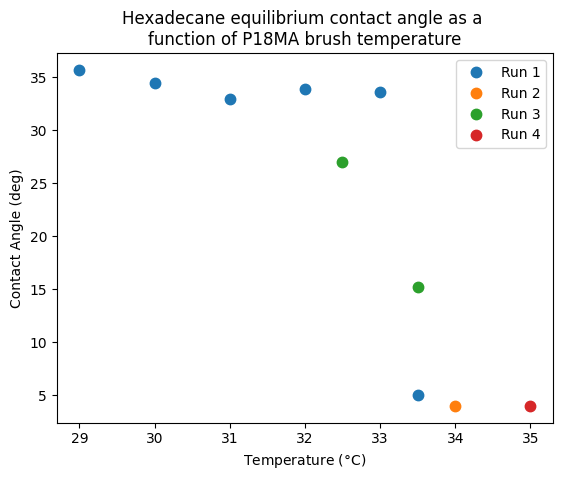

In [26]:
### Plotting for analysis of contact angle measurements. P18MA with hexadecane at various temperatures (2024/05/07).
import matplotlib.pyplot as plt
T1 = [29, 30, 31, 32, 33, 33.5]
Ca1 = [35.7, 34.5, 33.0, 33.9, 33.6, 5]
T2 = [34]
Ca2 = [4]
T3 = [32.5, 33.5]
Ca3 = [27, 15.2]
T4 = [35]
Ca4 = [4]
fig1, ax1 = plt.subplots()
msize = 15
ax1.plot(T1, Ca1, '.', label='Run 1', markersize = msize)
ax1.plot(T2, Ca2, '.', label='Run 2', markersize = msize)
ax1.plot(T3, Ca3, '.', label='Run 3', markersize = msize)
ax1.plot(T4, Ca4, '.', label='Run 4', markersize = msize)
ax1.legend(loc='best')
ax1.set(xlabel=f'Temperature ($\degree$C)', ylabel='Contact Angle (deg)', title='Hexadecane equilibrium contact angle as a \nfunction of P18MA brush temperature')
plt.show()
fig1.savefig("C:\\Downloads\\temp.png", dpi=600)

In [1]:
#Voorbeeldberekening capillary number voor gemeten contact line velocity 2024_05_07_PLMA_Basler15uc_Zeiss5x_dodecane_Xp1_31_S2_WEDGE_2coverslip_spacer_V3
U = (28.8 * 1E-6) / 60  #28.8um/min     -> Ca = 5.4E-8
#U = 0.083 * 1E-3 / 60 #uitgezoomde standaard video  mm/min  -> Ca = 1.55E-7
U = 0.013 * 1E-3 #van Yde mm/s -> Ca = 1.45E-6
eta = (3.03 * 1E-3) #viscosity hexadecane, 3.03mPa*s
gamma = 27 * 1E-3 #interfaceial tension hexadecane 27mN/m

Ca = (U*eta) / gamma
print(f"Ca = {Ca}")

Ca = 1.4588888888888885e-06


In [ ]:
### Testing Dirks Fourier fit thingy when no data at -pi/pi
import scipy
import pickle

#######
def manualFitting(inputX, inputY, path, Ylabel, N):
    I_k__c_j = lambda f_j1, f_j, phi_j1, phi_j, k:  f_j1 * (np.sin(k*phi_j1) / k +
                                                            (np.cos(k*phi_j1) - np.cos(k*phi_j)) / (k**2 * (phi_j1 - phi_j))) - \
                                                    f_j * (np.sin(k*phi_j)/k +
                                                            (np.cos(k*phi_j1) - np.cos(k*phi_j)) / (k**2 * (phi_j1 - phi_j)))
    f_k__c = lambda I_k__c, k, phi, f_phi : (1/np.pi) * sum([I_k__c_j(f_phi[j+1], f_phi[j], phi[j+1], phi[j], k) for j in range(0, len(f_phi)-1)])

    I_k__s_j = lambda f_j1, f_j, phi_j1, phi_j, k: f_j1 * (-np.cos(k * phi_j1) / k +
                                                           (np.sin(k*phi_j1) - np.sin(k * phi_j)) /
                                                           (k**2 * (phi_j1 - phi_j))) + \
                                                   f_j * (np.cos(k * phi_j) / k -
                                                          (np.sin(k*phi_j1) - np.sin(k * phi_j)) /
                                                          (k**2 * (phi_j1 - phi_j)))

    f_k__s = lambda I_k__s, k, phi, f_phi: (1 / np.pi) * sum([I_k__s_j(f_phi[j + 1], f_phi[j], phi[j + 1], phi[j], k) for j in range(0, len(f_phi)-1)])
    ##########
    #x = 1 value for phi to calculate the corresponding y for. k = 1 number, the max order to calculate the fit with.
    #f_c & f_k = sigma's for sin & cos: array of numbers with (at least) as many numbers as the desired order k
    f_phi = lambda x, k, f_c, f_s: sum([f_c[i] * np.cos(i*x) + f_s[i] * np.sin(i*x) for i in range(0, k+1)])
    ##########

    sigma_k_s = [0]     #sigma_k_s=0  at n=0
    sigma_k_c = [(1 / (2*np.pi)) * scipy.integrate.trapz(inputY, inputX)]

    for k in range(1, N[-1]+1): #for all orders in range 1 to N, determine the sigma's sin & cos.
        sigma_k_s.append(f_k__s(I_k__s_j, k, inputX, inputY))
        sigma_k_c.append(f_k__c(I_k__c_j, k, inputX, inputY))
    N = np.array([0] + N)
    X_range = np.linspace(min(inputX), max(inputX), 500)

    fig1, ax1 = plt.subplots()
    if len(N)>2:
        colorscheme = 'plasma'
        cmap = plt.get_cmap(colorscheme)
        colorGradient = np.linspace(0, 1, len(N))
    else:
        colorscheme = 'hsv'
        cmap = plt.get_cmap(colorscheme)
        colorGradient = [0.66, 0]

    func_range = lambda x_range: [f_phi(x, N[-1], sigma_k_c, sigma_k_s) for x in x_range]
    func_single = lambda x: f_phi(x, N[-1], sigma_k_c, sigma_k_s)

    for i, n in enumerate(N[1:]):
        Y_range = [f_phi(Xval, n, sigma_k_c, sigma_k_s) for Xval in X_range]
        ax1.plot(X_range, Y_range, '-', label=f'N={n}', linewidth=3,  color=cmap(colorGradient[i+1]))
    ax1.plot(inputX, inputY, '.', label='raw data',  color=cmap(colorGradient[0]), markersize=2)
    #TODO clean this up (messing with plot titles etc) for figure making
    #ax1.set(xlabel='Angle Phi (rad)', ylabel=f'{Ylabel[0]} {Ylabel[1]}', title=f"{Ylabel[0]} vs radial angle with fourier fitting")
    ax1.set(xlabel='Angle Phi (rad)', ylabel=f'{Ylabel[0]} {Ylabel[1]}',
            title=f"{Ylabel[0]} vs radial angle with fourier fitting\n"
                  f"Influence of function order parameter")
    ax1.legend(loc='best')
    fig1.savefig(os.path.join(path, f"{Ylabel[0]} Fourier fitted.png"), dpi=300)
    plt.show()
    return

print('We startin')
inputX, inputY, path, Ylabel, N = pickle.load('tempForManualFitting.pickle')
print('Imported pickle file')
manualFitting(inputX, inputY, path, Ylabel, N)